In [1]:
import pickle
import numpy as np

f=open("/media/maria/DATA/BrainObservatoryProcessedData/openai_clip-vit-base-patch32_embeddings.pkl",'rb')
currents=pickle.load(f)['natural_movie_one']
mn=np.min(currents)
print(mn)
currents=currents+(-mn)
print(np.max(currents))

-12.493422508239746
17.570687294006348


In [2]:
print(currents.shape)

(900, 768)


In [106]:
from brian2 import *

start_scope()
#stimulus = TimedArray(np.tile([100., 0.], 5)*Hz, dt=100.*ms)
stimulus=TimedArray(currents[:100,0]*Hz, dt=10.*ms)
P = PoissonGroup(70000, rates='stimulus(t)' , dt=10*ms)

M = SpikeMonitor(P)
Pop=PopulationRateMonitor(P)

run(1000*ms) 

In [107]:
P.dt

<poissongroup_2.dt: 10. * msecond>

In [112]:
print(max(M.t))

0.99 s


In [114]:
Pop.smooth_rate(width=100*ms).shape

(100,)

In [46]:
P.dt

<poissongroup_2.dt: 100. * usecond>

In [115]:
import brian2
plt.plot(Pop.smooth_rate(width=10*brian2.ms))
plt.plot(currents[:100,0])

In [31]:
plot(Pop.t/ms, Pop.rate/Hz, '.k')

In [21]:
stimulus

In [28]:
plot(M.t/ms, M.i, '.k')

In [6]:
print(stimulus)

In [7]:
print(len(M.i))
print(len(M.t))

1324
1324


In [50]:
M.t

<spikemonitor.t: array([3.000e-01, 2.400e+00, 2.800e+00, ..., 9.988e+02, 9.988e+02,
       9.997e+02]) * msecond>

In [116]:

def bin_spikes(spike_monitor, n_neurons, t_total, bin_size):
    # t_total is in seconds
    # bin_size
    spikes_neurons = spike_monitor.i
    spikes_times = spike_monitor.t
    time_series_array = []
    print(np.max(spikes_times))
    bins = np.linspace(0, t_total, int(t_total//bin_size))
    print(len(bins))
    print(bins)
    for neuron in range(n_neurons):
        inds = np.where(spikes_neurons == neuron)
        spike_times_neuron = spikes_times[inds[0]]
        #print(spike_times_neuron)
        binned_ts = np.histogram(spike_times_neuron, bins)[0]
        time_series_array.append(binned_ts)
    time_series_array = np.array(time_series_array)
    return time_series_array

my_arr=bin_spikes(M, 1000, 1, 0.01)

0.99
99
[0.         0.01020408 0.02040816 0.03061224 0.04081633 0.05102041
 0.06122449 0.07142857 0.08163265 0.09183673 0.10204082 0.1122449
 0.12244898 0.13265306 0.14285714 0.15306122 0.16326531 0.17346939
 0.18367347 0.19387755 0.20408163 0.21428571 0.2244898  0.23469388
 0.24489796 0.25510204 0.26530612 0.2755102  0.28571429 0.29591837
 0.30612245 0.31632653 0.32653061 0.33673469 0.34693878 0.35714286
 0.36734694 0.37755102 0.3877551  0.39795918 0.40816327 0.41836735
 0.42857143 0.43877551 0.44897959 0.45918367 0.46938776 0.47959184
 0.48979592 0.5        0.51020408 0.52040816 0.53061224 0.54081633
 0.55102041 0.56122449 0.57142857 0.58163265 0.59183673 0.60204082
 0.6122449  0.62244898 0.63265306 0.64285714 0.65306122 0.66326531
 0.67346939 0.68367347 0.69387755 0.70408163 0.71428571 0.7244898
 0.73469388 0.74489796 0.75510204 0.76530612 0.7755102  0.78571429
 0.79591837 0.80612245 0.81632653 0.82653061 0.83673469 0.84693878
 0.85714286 0.86734694 0.87755102 0.8877551  0.89795918 

In [59]:
my_arr.shape

(100, 9998)

In [24]:
my_ts

array([[0, 0, 0, ..., 0, 0, 2],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [11]:
my_ts[1].shape

(99,)

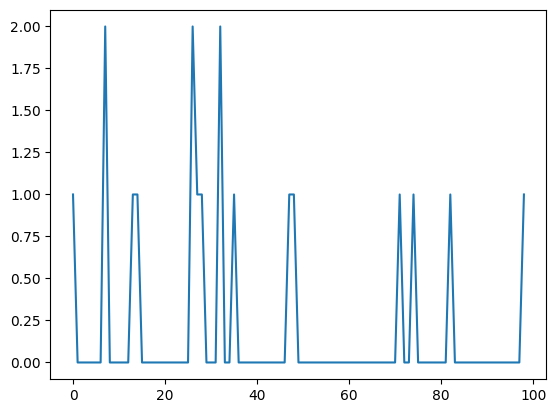

In [12]:
import matplotlib.pyplot as plt

plt.plot(my_ts[1])

In [117]:
from sklearn.decomposition import PCA
%matplotlib qt
pca=PCA(n_components=90)
pcs=pca.fit_transform(my_arr.T)
print(pcs.shape)
# Create a 3D PCA plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot features for natural movie sequence
ax.scatter(
    pcs[:, 0],
    pcs[:, 1],
    pcs[:, 2],
    c='blue',
)

ax.set_title('3D PCA Plot of DINO Features')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


(98, 90)


In [14]:
plt.plot(pcs[:,0])

TypeError: plot() missing 1 required positional argument: 'ys'

In [18]:
np.sum(pca.explained_variance_ratio_)

0.9994806800803135

In [119]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))